In [38]:
import os
import glob
import pandas as pd
from collections import Counter

In [107]:
path_corpus = '../../OE_data/texts/'
calgary_files = glob.glob(path_corpus + "calgary/*.txt")
calgary_all =  "out_calgary.txt"
# calgary_files[0]

In [108]:
def write_all(from_files, to_file):
    if os.path.exists(to_file):
        os.remove(to_file)
    with open(to_file, "wb") as out_file:
        for f in from_files:
            with open(f, "rb") as infile:
                out_file.write(infile.read())
write_all(calgary_files, calgary_all)

In [60]:
def get_words(fname):
    with open(fname, 'r') as f:
        return f.read().split()

In [63]:
all_words = get_words(calgary_all)
d = dict(Counter((w[0] for w in all_words)))
d['p']

132

In [103]:
df = pd.DataFrame(d.items(), columns=['letter', 'quantity'])
df = df.sort_values(by=['quantity'], ascending=False)
df = df.loc[~df['letter'].isin(['#', '.', ';', '!', ':', '(', ')', '?', '\'', '\"', ','])]
df.reset_index(drop=True, inplace=True)
df

,letter,quantity
0,h,19035
1,þ,17402
2,s,16850
3,w,14554
4,g,14541
5,o,11040
6,m,10818
7,f,9664
8,a,7742
9,e,7607


In [109]:
df = df.loc[~df['letter'].isin(['o', 'a', 'e', 'i', 'æ', 'u'])]
df

,letter,quantity
0,h,19035
1,þ,17402
2,s,16850
3,w,14554
4,g,14541
6,m,10818
7,f,9664
10,b,7343
11,n,5171
12,l,4973


In [110]:
df.sum()

letter      hþswgmfbnldtcðrypkxqvzᛟ
quantity                     138137
dtype: object

<AxesSubplot:>

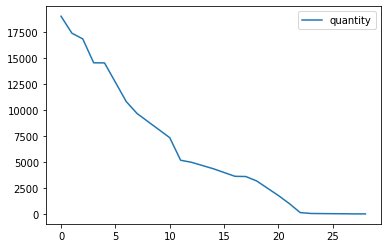

In [115]:
df.plot()

In [243]:
def load_data_node(path, usecols=None):
    return pd.read_csv(path, 
                       delimiter=';',
                       na_filter= True,
                       usecols=usecols
                      )

def rename_columns(df, mapper):
    return df.rename(mapper, axis='columns')

def filter_length_more_then(df, column, min_length):
    return df[df[column].str.len() > min_length]

def filter_null(df, column):
    return df[df[column].notna()]

def filter_not_in_prefix(df, prefixes):
    return df[~df['word'].str.startswith(tuple((p+'-' for p in prefixes)))]


def get_first_letter(df, column):
    df[column] = df['word'].str.lower().str[0]
    return df

def filter_in(df, column, arr):
    return df[~df[column].isin(arr)]


def count(df, column, to):
    return df.groupby(column).size().reset_index(name=to)

def sort(df, column):
    return df.sort_values(by=column, ascending=False).reset_index(drop=True) 
# , inplace=True

# column = 'title_search'
path = path_corpus + 'BT/node.csv'
column = 'title'
word = 'word'
letter = 'letter'
counts = 'counts'
prefixes = ['ge', ' on', ' be', ' ofer', ' a', ' +at', ' for']
vouwels = ['o', 'a', 'e', 'i', 'æ', 'u']
res=(
    load_data_node(path, [column])
    .pipe(rename_columns, {column: word})
    .pipe(filter_null, word)
    .pipe(filter_length_more_then, word, 1)
    .pipe(filter_not_in_prefix, prefixes)
    .pipe(get_first_letter, letter)
    .pipe(filter_in, letter, vouwels)
    .pipe(count, letter, counts)
    .pipe(sort, counts)
)
res

,letter,counts
0,f,5874
1,s,5261
2,b,5083
3,h,4853
4,w,3473
5,g,2981
6,c,2957
7,m,2088
8,l,1783
9,d,1719


In [244]:
res=(
    load_data_node(path, [column])
    .pipe(rename_columns, {column: word})
    .pipe(filter_null, word)
    .pipe(filter_length_more_then, word, 1)
#     .pipe(filter_not_in_prefix, prefixes)
    .pipe(get_first_letter, letter)
    .pipe(filter_in, letter, vouwels)
    .pipe(count, letter, counts)
    .pipe(sort, counts)
)
res

,letter,counts
0,g,9637
1,f,5874
2,s,5261
3,b,5083
4,h,4853
5,w,3473
6,c,2957
7,m,2088
8,l,1783
9,d,1719


In [224]:
# res[res['word'].isnull()]
res[ res['word'].str.startswith(tuple(['s', 'w'])) ]

,word,letter
26109,sa,s
26110,saban,s
26114,sac,s
26115,sac,s
26116,saca,s
...,...,...
62808,sear,s
62809,sic,s
62811,weornian,w
62812,werigian,w
